# Outline
0. Generating ergodic trajectories
1. Trajectory/Distribution perturbation vs Fourier Coefficient
    - induced distribution from trajectory
    - distribution vs fourier coefficient
2. Fourier coefficient perturbation vs ergodic metric perturbation

In [1]:
distribution_name = "one_peak"
perturbation_type = "uniform" # "gaussian"
perturbation_amts = [0]
time_steps = 10
K = 5
system_name = "mm_1"
compute_mu = False

In [2]:
import numpy as np
U_shape = (1,1)
all_k = list(np.ndindex(*[K]*len(U_shape)))

# 0. Generate ergodic trajectories

## 0.a. Define probability distribution $\mu$

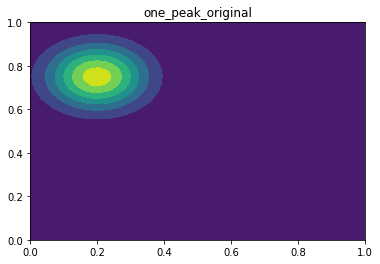

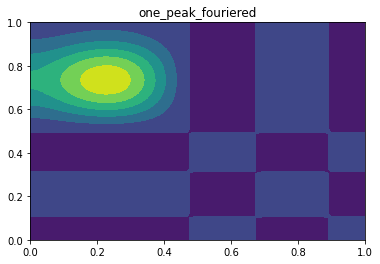

In [3]:
# defining probability distribution mu
from probability_distribution import *

mu = mu_gaussians([(np.array([0.2, 0.75]), 0.02)], U_shape)
mu = mu_normalize(mu, U_shape)

# calculating fourier coefficients of probability distribution mu
from fourier_functions import *
import pickle

ff = Fourier_Functions(mu, U_shape, K, compute_mu=compute_mu)
if compute_mu:
    mu_k = {}
    for k in ff:
        mu_k[k] = ff[k]['mu_k']

    with open(f'mu/{distribution_name}_{K}.pkl', 'wb') as handle:
        pickle.dump(mu_k, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(f'mu/{distribution_name}_{K}.pkl', 'rb') as handle:
        mu_k = pickle.load(handle)
    for k in ff:
        ff[k]['mu_k'] = mu_k[k]

original_mu = mu 
mu_display2D(original_mu, U_shape, title=f"mu/{distribution_name}_original")

mu = fourier_coefficient2distribution(ff, all_k, c_k=None)
mu_display2D(mu, U_shape, title=f"mu/{distribution_name}_fouriered")


## 0.b. Define agent system

In [4]:
from ergodic_agents import *
from mm_agent import *

agent1 = MMAgent1(0, np.array([0.2, 0.3]), 0.5, all_k, U_shape, ff, eps=1e-5)
system = AgentSystem([agent1], mu, U_shape, ff, K)

## 0.c. Generate Vanilla Ergodic Trajectory $x$

In [5]:
t = 0
delta_t = 0.1
for i in range(time_steps):
    t = i * delta_t
    system.evolve(t, delta_t)

system.visualize2d(filename=f"system={system_name}_mu={distribution_name}_K={K}_T={time_steps}", additional_title=f"{system_name} on {distribution_name}", plot_c_k=False)


# TODO plot final trajectory
# TODO plot ergodicity

# 1. Trajectory/distribution perturbation vs Fourier coefficient

In [ ]:
perturbation = {p_amt:{ "mu_k": None, 
                        "trajectory": None, 
                        "c_k": None} for p_amt in perturbation_amts}

## 1.a. induced distribution from trajectory

In [ ]:
spatial_distribution = fourier_coefficient2distribution(ff, all_k, c_k=system.c_k)
mu_display2D(spatial_distribution, U_shape, title=f"system={system_name}_mu={distribution_name}_K={K}_T={time_steps}_induced_spatial_distribution")
# TODO final induced distribution with trajectory

## 1.b. distribution perturbations vs Fourier coefficients

In [ ]:
for p_amt in perturbation:
    # trajectory perturbations
    perturbed_trajectory = None 
    perturbation[p_amt]["trajectory"] = perturbed_trajectory
    perturbation[p_amt]["c_k"] = {k: sum([ff[k]['f_k'](x) for x in perturbed_trajectory])/len(perturbed_trajectory) for k in ff}

    # TODO original vs perturbed trajectory
    # TODO induced perturbed distribution with and without trajectory
    # TODO plot trajectory perturbation amount to c_k perturbation amount

    # information distribution perturbations
    perturbation[p_amt]["mu_k"] = None


# 2. Fourier coefficient perturbation vs ergodic metric perturbation

In [ ]:
def ergodic_metric(lambda_k, c_k, mu_k):
    return sum([lambda_k[k]*(c_k[k] - mu_k[k])**2 for k in lambda_k])

_lambda_k = {k: ff[k]['lambda_k'] for k in ff}
for p_amt in perturbation:
    perturbation[p_amt]["ergodicity change c_k"] = ergodic_metric(_lambda_k, perturbation[p_amt]["c_k"], mu_k)
    perturbation[p_amt]["ergodicity change mu_k"] = ergodic_metric(all_k, system.c_k, perturbation[p_amt]["mu_k"])

with open(f'perturbations/{perturbation_type}_{perturbation_amts}.pkl', 'wb') as handle:
    pickle.dump(perturbation, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# TODO plot the perturbations